CIFAR-10, toplam 10 farklı kategoriden oluşur. Bu kategoriler şunlardır: uçak, otomobil, kuş, kedi, geyik, köpek, kurbağa, at, gemi ve kamyon.

# 1. Veri Setini Yükleme ve Ön İşleme

In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,InputLayer,Reshape,MaxPooling2D,Flatten
from tensorflow.keras.preprocessing import image

from matplotlib import pyplot as plt

In [3]:
# Veri setini yükleme
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [13]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
# Normalizasyon (0-1 aralığında ölçeklendirme)
x_train = x_train.astype('float32') / 255 #veriyi 255 e böldük
x_test = x_test.astype('float32') / 255

In [5]:
# Etiketleri one-hot encoding ile dönüştürme
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 2. Modeli Oluşturma

#CNN - Convolutional Neural Network - Resim tanıma modeli

In [18]:
model = Sequential()
model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation ='relu'))
model.add(Dense(10, activation ='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

# 3. Model Eğitimi

In [ ]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

# Kendi Görüntümüz Üzerinde Tahmin Yapma

In [21]:
# CIFAR-10 sınıf isimleri
sinif_isimleri = ['uçak', 'otomobil', 'kuş', 'kedi', 'geyik', 'köpek', 'kurbağa', 'at', 'gemi', 'kamyon']

In [24]:
def resmimiz(resim_yolu):
    # Görüntüyü yükleme ve işleme
    img = image.load_img(resim_yolu, target_size=(32, 32))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Tahmin yapma
    prediction = model.predict(img_array)

    # Tahmini gösterme
    plt.imshow(img)
    plt.title("Tahmin: " + sinif_isimleri[np.argmax(prediction)])
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 47ms/step


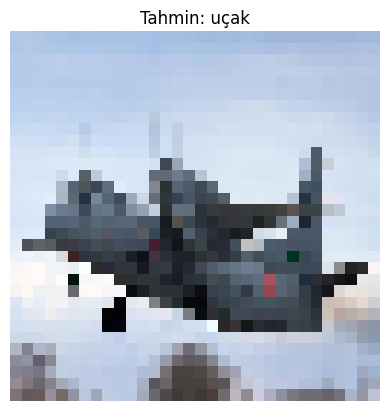

In [25]:
resmimiz('plane.jpg')

1/1 [==============================] - 0s 35ms/step


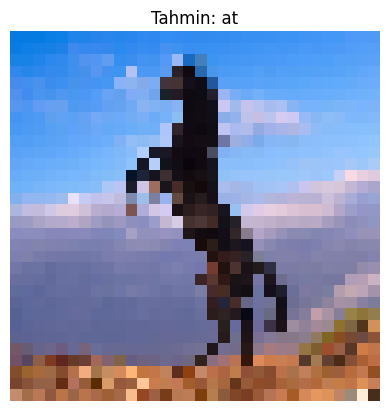

In [26]:
resmimiz('at.jpg')

1/1 [==============================] - 0s 22ms/step


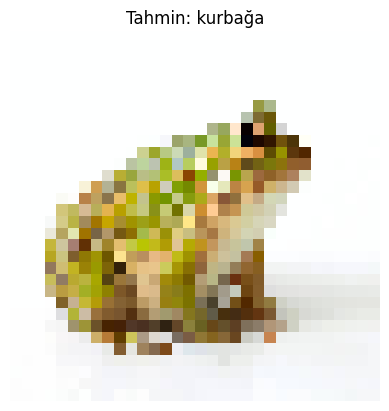

In [29]:
resmimiz('frog.png')